<a href="https://colab.research.google.com/github/vamado09/Applied-Data-Science/blob/main/Week2_VicenteDeLeon_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Missing Data - Coding Assesment Part 1 (Week2)

Vicente De Leon

IU_id: 2001014594

APPLIED DATA SCIENCE: 9998

As a person who actually enjoys doing statistical analysis, creating ML algorithms and neural networks from scratch, I personally believe that:

- data manipulation (including handling missing data)
- exploratory data analysis (both descriptive and inferential statistics)
- feature engineering/extraction

are some of the most crucial steps in data science, especially in statistics and machine learning.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Step 1 and 2 - Missing Data in Python

Source: https://wesmckinney.com/book/data-cleaning.html#pandas_missing_data

Source: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.04-Missing-Values.ipynb

Both tutorials contain almost the excat same information

## Handling Missing Data

I just landed a job in the pricing analytics area of a company in which I will be in charge of creating Python automation tools that will manipulate competitors prices (Walmart, Costco, Publix etc) and I will be facing missing data. Our Third Party Data collection company sometimes shares missing prices for some protein items and I htink this might be a good example for me to practice.

In [2]:
# Creating small pricing df sample -> inlcuding some NaN values
data = {
    'Protein': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meats'],
    'Walmart': [4.99, 5.99, 3.78, 8.99, 6.49],
    'Costco': [4.89, np.nan, 6.49, 8.89, 6.29],
    'Trader Joes': [7.89, 5.89, 6.59, 8.79, np.nan],
    'Aldi': [np.nan, np.nan, np.nan, np.nan, np.nan],
    'Publix': [5.09, 6.19, 6.79, np.nan, 6.59]
}

# data to df
prices_df = pd.DataFrame(data)

prices_df

,Protein,Walmart,Costco,Trader Joes,Aldi,Publix
0,Poultry,4.99,4.89,7.89,NaN,5.09
1,Beef,5.99,NaN,5.89,NaN,6.19
2,Pork,3.78,6.49,6.59,NaN,6.79
3,Seafood,8.99,8.89,8.79,NaN,NaN
4,Specialty Meats,6.49,6.29,NaN,NaN,6.59


In [3]:
prices_df = prices_df.iloc[:, 1:] # just focusing on competitors not protein category
prices_df.isna() # booleans (true vs false)

,Walmart,Costco,Trader Joes,Aldi,Publix
0,False,False,False,True,False
1,False,True,False,True,False
2,False,False,False,True,False
3,False,False,False,True,True
4,False,False,True,True,False


In [4]:
prices_df.isna().dtypes

,0
Walmart,bool
Costco,bool
Trader Joes,bool
Aldi,bool
Publix,bool


We can also use **None** values (trated as NaN values)

In [5]:
data_none = {
    'Protein': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meats'],
    'Walmart': [4.99, 5.99, 3.78, 8.99, 6.49],
    'Costco': [4.89, np.nan, 6.49, 8.89, 6.29],
    'Trader Joes': [7.89, 5.89, 6.59, 8.79, None],
    'Aldi': [np.nan, None, np.nan, None, np.nan],
    'Publix': [5.09, 6.19, 6.79, np.nan, 6.59]
}

prices_df2 = pd.DataFrame(data_none)
prices_df2

,Protein,Walmart,Costco,Trader Joes,Aldi,Publix
0,Poultry,4.99,4.89,7.89,NaN,5.09
1,Beef,5.99,NaN,5.89,NaN,6.19
2,Pork,3.78,6.49,6.59,NaN,6.79
3,Seafood,8.99,8.89,8.79,NaN,NaN
4,Specialty Meats,6.49,6.29,NaN,NaN,6.59


In [6]:
prices_df2 = prices_df2.iloc[:, 1:] # just focusing on competitors not protein category
prices_df2.isna() # booleans (true vs false)

,Walmart,Costco,Trader Joes,Aldi,Publix
0,False,False,False,True,False
1,False,True,False,True,False
2,False,False,False,True,False
3,False,False,False,True,True
4,False,False,True,True,False


In [7]:
prices_df2.isna().dtypes

,0
Walmart,bool
Costco,bool
Trader Joes,bool
Aldi,bool
Publix,bool


In [8]:
data_none = {
    'Protein': ['Poultry', 'Beef', 'Pork', 'Seafood', 'Specialty Meats'],
    'Walmart': [4.99, 5.99, np.nan, 8.99, 6.49],
    'Costco': [4.89, 2.87, 6.49, 8.89, 6.29],
    'Trader Joes': [7.89, 5.89, 6.59, 8.79, np.nan],
    'Aldi': [2.00, 3.78, 5.77, 9.42, 2.55],
    'Publix': [5.09, 6.19, 6.79, 6.99, 6.59]
}

prices_df3 = pd.DataFrame(data_none)
prices_df3 = prices_df3.iloc[:, 1:]
prices_df3.dropna()

,Walmart,Costco,Trader Joes,Aldi,Publix
0,4.99,4.89,7.89,2.00,5.09
1,5.99,2.87,5.89,3.78,6.19
3,8.99,8.89,8.79,9.42,6.99


The above excersice is just to demonstrate that we can't drop single values from a df, we can only drop entire rows or columns. By default, the dropna() method will drop all rows in which any null value presented.

In [28]:
1 + np.nan

nan

In [30]:
 # 1 * None -> will return TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

Taking into account the Colab notebook "03.04. Missing Values", it is important to remember that Python doesn't support arithmetic operations with None values, so "sum" or "min" will lead to error if we have these values.


Some functions that will help handling missing data:



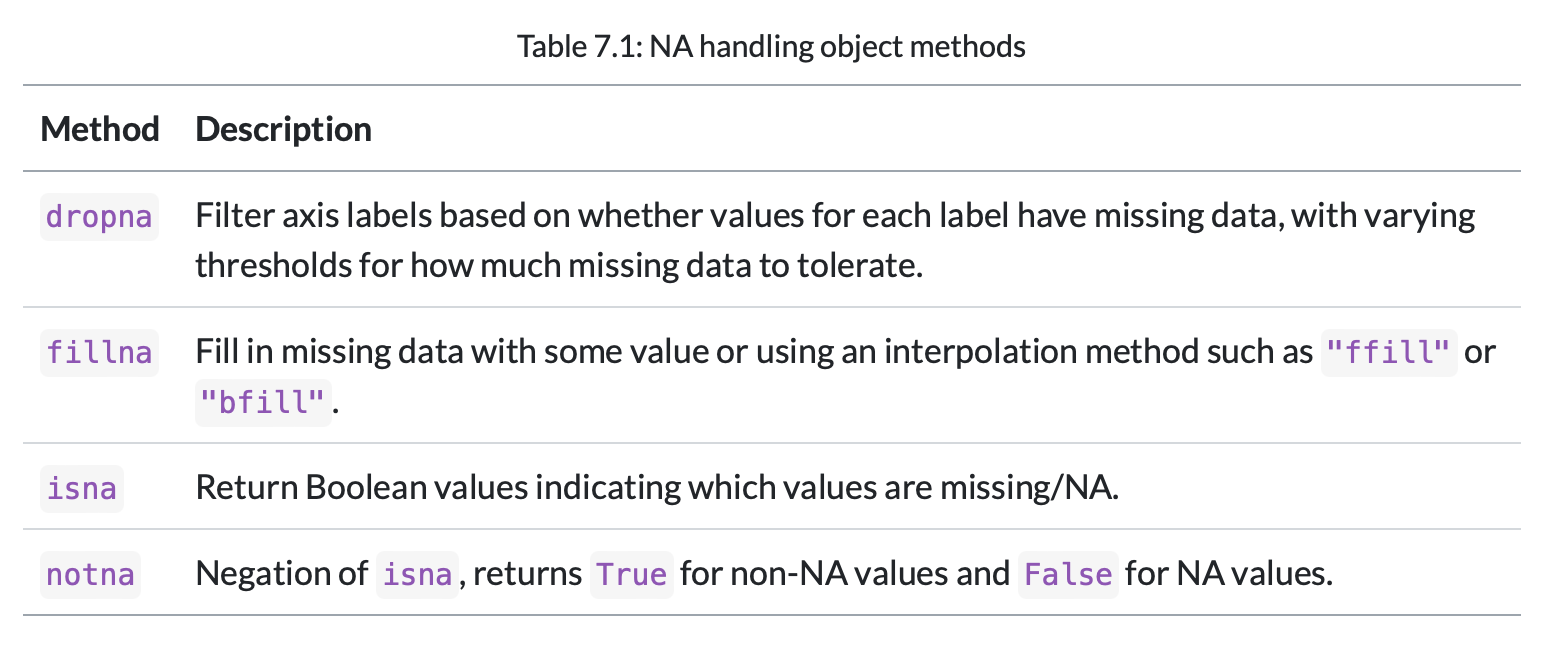

## Filtering Out Missing Data

In [9]:
# Lets convert the walmart column into a series to follow the example
costco = prices_df['Costco']

# Dropping NaN values from walmart series
costco_series = costco.dropna() # filtering using -> dropna()

costco_series

,Costco
0,4.89
2,6.49
3,8.89
4,6.29


In [10]:
publix_series = prices_df['Publix']

# Dropping NaN values from Costco series
publix_series[publix_series.notna()] # -> using notna()

,Publix
0,5.09
1,6.19
2,6.79
4,6.59


Let's use the price_df now:

In [11]:
prices_df # original prices_df

,Walmart,Costco,Trader Joes,Aldi,Publix
0,4.99,4.89,7.89,NaN,5.09
1,5.99,NaN,5.89,NaN,6.19
2,3.78,6.49,6.59,NaN,6.79
3,8.99,8.89,8.79,NaN,NaN
4,6.49,6.29,NaN,NaN,6.59


In [12]:
# how = all will only drop rows that are all NA -> Aldi column is all NaN values

prices_df.dropna(axis=1, how='all') # drops Aldi

,Walmart,Costco,Trader Joes,Publix
0,4.99,4.89,7.89,5.09
1,5.99,NaN,5.89,6.19
2,3.78,6.49,6.59,6.79
3,8.99,8.89,8.79,NaN
4,6.49,6.29,NaN,6.59


In [13]:
prices_df.dropna(axis = 'columns', how = 'all') # dropping columns using another technique

,Walmart,Costco,Trader Joes,Publix
0,4.99,4.89,7.89,5.09
1,5.99,NaN,5.89,6.19
2,3.78,6.49,6.59,6.79
3,8.99,8.89,8.79,NaN
4,6.49,6.29,NaN,6.59


Using Thresh = 2 (Code Below)

The below codes works the following way:

- Row 0 has two non NaN values: Walmart = 4.99 and Publix = 5.09 (meets thresh 2).

- Row 3 has two non NaN values: Walmart = 8.99 and Costco = 5.50 (meets thresh 2)

- Rows 1, 2, and 4 don't meet this threshold because they each have fewer than two non NaN values. As as a result, they are getting dropped.

In [14]:
data = {
    'Walmart': [4.99, np.nan, np.nan, 8.99, np.nan],
    'Costco': [np.nan, np.nan, np.nan, 5.50, np.nan],
    'Trader Joes': [np.nan, np.nan, 7.20, np.nan, np.nan],
    'Aldi': [np.nan, np.nan, np.nan, np.nan, np.nan],
    'Publix': [5.09, np.nan, np.nan, np.nan, 6.59]
}


prices_df4 = pd.DataFrame(data)

In [15]:
# thresh=2
prices_df4.dropna(thresh=2)

,Walmart,Costco,Trader Joes,Aldi,Publix
0,4.99,NaN,NaN,NaN,5.09
3,8.99,5.5,NaN,NaN,NaN


In [16]:
prices_df4 = prices_df4.fillna(method='ffill', limit=2) # import warnings
prices_df4

,Walmart,Costco,Trader Joes,Aldi,Publix
0,4.99,NaN,NaN,NaN,5.09
1,4.99,NaN,NaN,NaN,5.09
2,4.99,NaN,7.2,NaN,5.09
3,8.99,5.5,7.2,NaN,NaN
4,8.99,5.5,7.2,NaN,6.59


The above code works as follows:

Walmart:
- The initial value of 4.99 in row 0 forward fills to rows 1 and 2 because of the limit of 2. The value 8.99 in row 3 is a new value and then it fills row 4 as shown above.

Costco:
- The first value 5.50 appears in row 3 and fills row 4. The earlier NaN values remain the same because there's no preceding value.

In [17]:
prices_df4 = prices_df4.fillna(method='bfill')
prices_df4

,Walmart,Costco,Trader Joes,Aldi,Publix
0,4.99,5.5,7.2,NaN,5.09
1,4.99,5.5,7.2,NaN,5.09
2,4.99,5.5,7.2,NaN,5.09
3,8.99,5.5,7.2,NaN,6.59
4,8.99,5.5,7.2,NaN,6.59


Using **bfill**, every NaN was replaced by the nearest valid value below (except for Aldi column). For example:

In the case of Walmart, the NaN in rows 1 and 2 were backward filled with the value 8.99 from row 3.The value 4.99 in row 0 remained unchanged because there were no NaNs above it.

etc

In [18]:
prices_df4 = prices_df4.fillna(method='ffill', axis=1) # left to right
prices_df4

,Walmart,Costco,Trader Joes,Aldi,Publix
0,4.99,5.5,7.2,7.2,5.09
1,4.99,5.5,7.2,7.2,5.09
2,4.99,5.5,7.2,7.2,5.09
3,8.99,5.5,7.2,7.2,6.59
4,8.99,5.5,7.2,7.2,6.59


The above code using 'ffill' and axis = 1, will fill missing values horizontally within the same row. It fills NaN values by propagating values from left to right within each row.

**Lets fill prices_df4 missing values with 0:**

- As an example all Aldi values are replaced (filled) by 0s.

- Filling missing values in feature engineering is extremely important for model performance and accuracy!

In [21]:
prices_df4.fillna(0)

,Walmart,Costco,Trader Joes,Aldi,Publix
0,4.99,0.0,0.0,0.0,5.09
1,4.99,0.0,0.0,0.0,5.09
2,4.99,0.0,7.2,0.0,5.09
3,8.99,5.5,7.2,0.0,0.00
4,8.99,5.5,7.2,0.0,6.59


Filling missing values using MEAN (we can do the same with median)

Source: https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/

In [19]:
data = {
    'Walmart': [4.99, np.nan, np.nan, 8.99, np.nan],
    'Costco': [np.nan, np.nan, np.nan, 5.50, np.nan],
    'Trader Joes': [np.nan, np.nan, 7.20, np.nan, np.nan],
    'Aldi': [7.98, np.nan, np.nan, np.nan, 4.98], # adding some values into Aldi to replace with mean and median
    'Publix': [5.09, np.nan, np.nan, np.nan, 6.59]
}

prices_df5 = pd.DataFrame(data)

In [20]:
mean_values = prices_df5.mean() # calculating mean values

# Replacing NaN values with the mean of each column
mean_prices_df = prices_df5.fillna(mean_values)
mean_prices_df

,Walmart,Costco,Trader Joes,Aldi,Publix
0,4.99,5.5,7.2,7.98,5.09
1,6.99,5.5,7.2,6.48,5.84
2,6.99,5.5,7.2,6.48,5.84
3,8.99,5.5,7.2,6.48,5.84
4,6.99,5.5,7.2,4.98,6.59


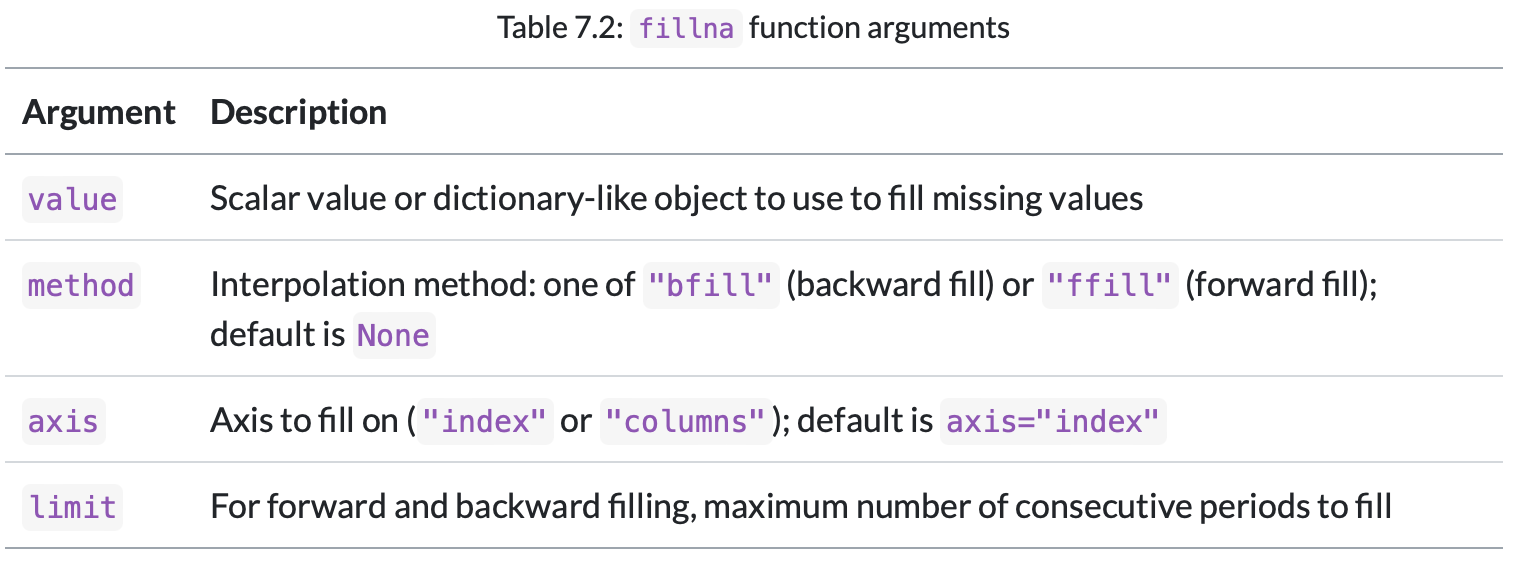